In [63]:
# import pyplot
import os
import pandas as pd
import nltk

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# os.chdir('/Desktop/Code Classes/Tools for Analytics/Project/yelp_dataset')

with open('yelp_academic_dataset_review.json', 'r') as f:
    data = f.readlines()
    
dff2 = map(lambda x: x.rstrip(), data[:10000])

data_json_str = "[" + ','.join(dff2) + "]"

reviews = pd.read_json(data_json_str)

In [54]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    import re
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

# def clean_dataframe(data):
#     "drop nans, then apply 'clean_sentence' function to question1 and 2"
#     data = data.dropna(how="any")
    
#     for col in ['question1', 'question2']:
#         data[col] = data[col].apply(clean_sentence)
    
#     return data

# data = clean_dataframe(data)

In [55]:
reviews = reviews.dropna(how="any")

In [56]:
reviews["clean_reviews"] = reviews["text"].apply(clean_sentence)

In [77]:
reviews_5=reviews[reviews["stars"]==5]
reviews_1=reviews[reviews["stars"]==1]

In [78]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['clean_reviews']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(reviews_1)        
corpus[0:2]

[['terrible',
  'dry',
  'corn',
  'bread',
  'rib',
  'tips',
  'fat',
  'mushy',
  'flavor',
  'bbq',
  'neighborhood',
  'go',
  'john',
  'mulls',
  'roadkill',
  'grill',
  'trust'],
 ['place',
  'sucks',
  'customer',
  'service',
  'horrible',
  'dont',
  'serve',
  'food',
  'unless',
  'order',
  'pizza',
  'neighboring',
  'restaurant',
  'dont',
  'control',
  'crowd',
  'many',
  'times',
  'ive',
  'gone',
  'ive',
  'seen',
  'fights',
  'bartenders',
  'suck',
  '',
  'ive',
  'almost',
  'got',
  'fight',
  'one',
  'complete',
  'bitch',
  'refused',
  'serve',
  'drink',
  'busy',
  'celebrating',
  'friends',
  'birthday',
  'behind',
  'bar',
  'place',
  'ridiculous',
  'never',
  'go',
  'ever']]

In [70]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['pizza']

array([-0.39745978,  0.06999911,  0.24981983,  0.35582823,  0.56736594,
        0.22853425, -0.39627022, -0.21105531, -0.15274218, -0.8657847 ,
       -0.17985782,  0.19935118,  0.06090482,  0.1093676 ,  0.25949663,
        0.313999  ,  0.2815064 , -0.10567984,  0.2110407 ,  0.6526485 ,
       -0.11214073, -0.24259037, -0.29902664,  0.3937112 , -0.2525401 ,
       -0.34045565, -0.40945348, -0.1253488 ,  0.21366449, -0.06273919,
       -0.31949916,  0.26084793,  0.47620797,  0.00144168, -0.49093968,
        0.272246  , -0.258335  ,  0.00402117,  0.25941494,  0.3605001 ,
       -0.60074145, -0.29366687,  0.00465989, -0.62877494, -0.43069625,
       -0.18345372, -0.3276031 , -0.11174744, -0.22425327,  0.09649308,
        0.43157098,  0.07080016, -0.44272003,  0.32629558,  0.15777275,
       -0.03542746,  0.2097742 ,  0.01813063, -0.1620622 , -0.14342888,
        0.17701007,  0.09716474,  0.1259457 , -0.14659077,  0.29296482,
       -0.27036712,  0.38652524,  0.47106797,  0.32795295, -0.16

In [73]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


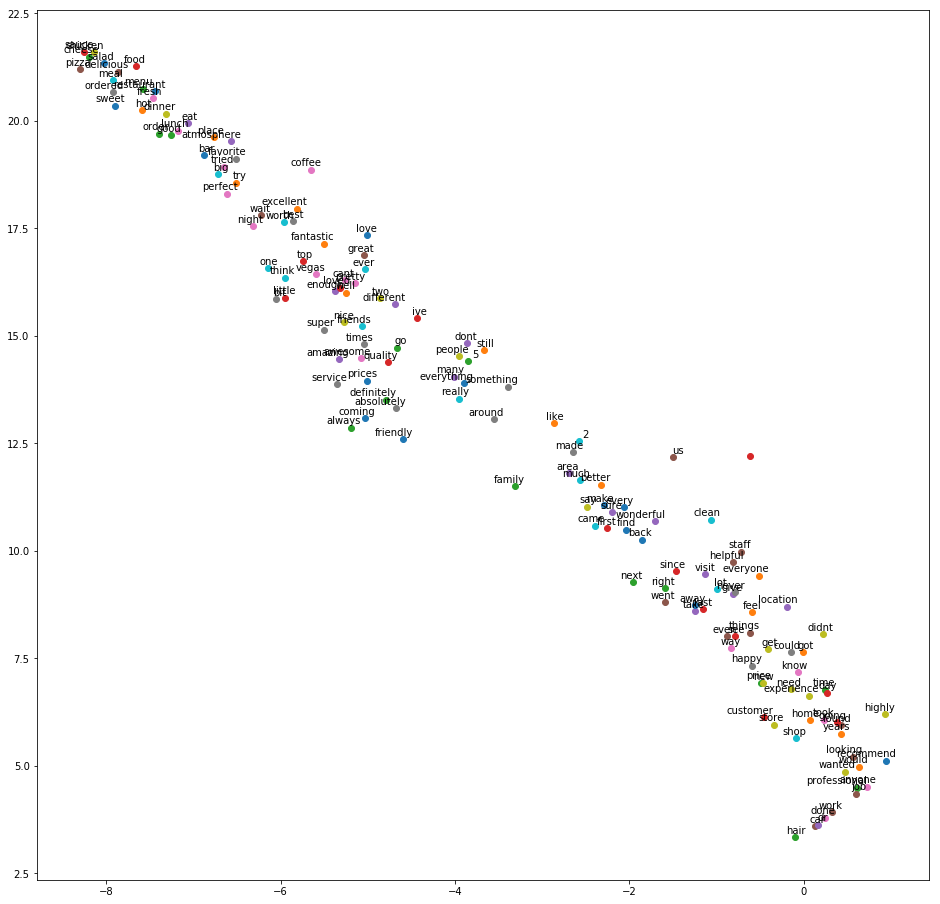

In [74]:
tsne_plot(model)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


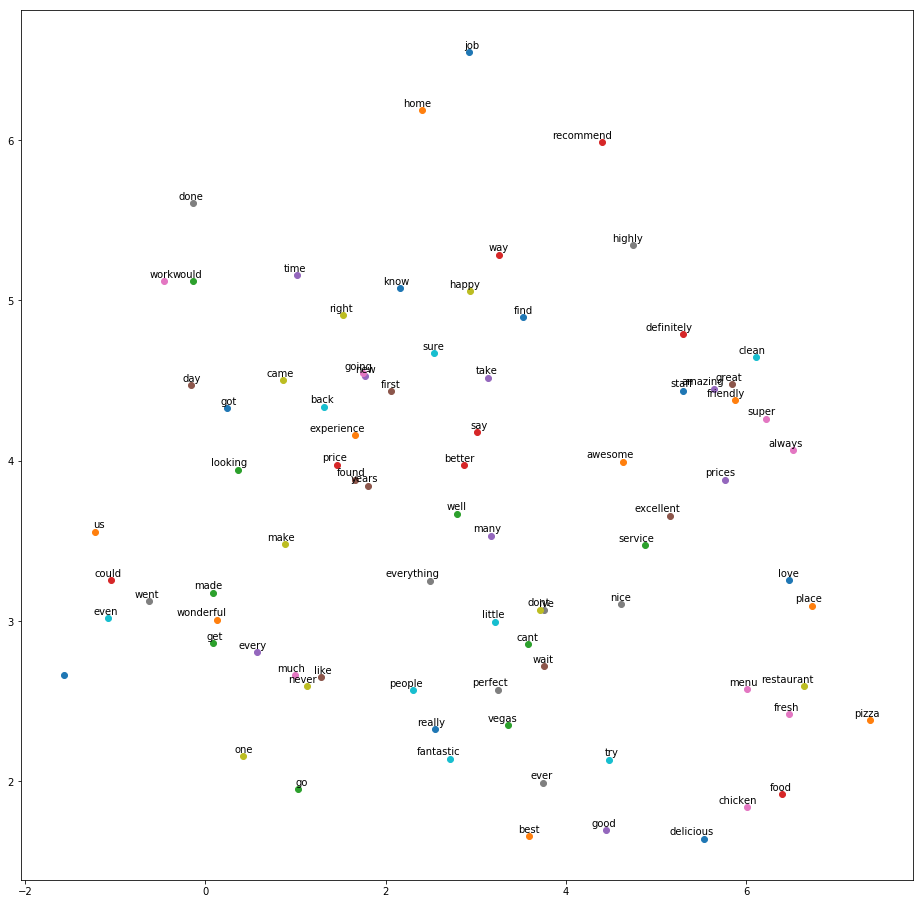

In [76]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=300, workers=4)
tsne_plot(model)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


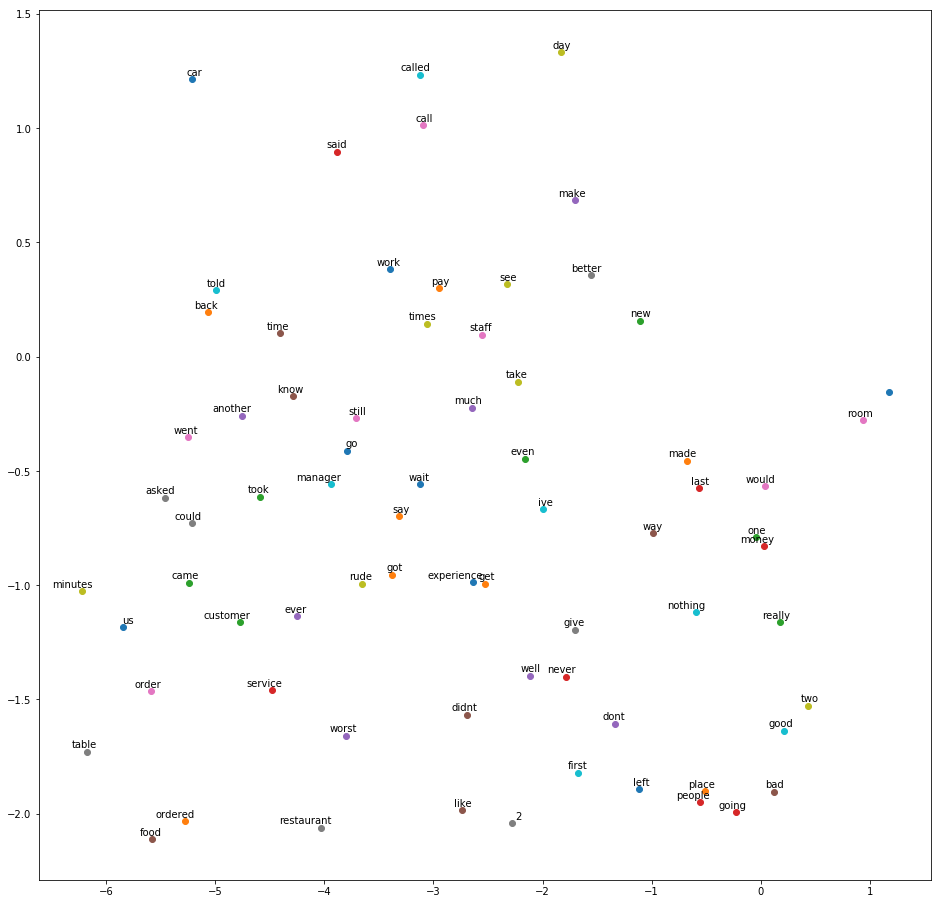

In [82]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
tsne_plot(model)

In [22]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 1.87005557e-03 -7.45558005e-04  1.04549131e-03 -3.82605009e-03
  1.17204222e-03  1.20723702e-03 -4.97500296e-04 -3.88474576e-03
 -2.38581887e-03  2.28992221e-03  3.55170853e-03 -4.50636307e-03
 -3.96352727e-03 -2.40180106e-03 -9.85427643e-04 -8.74145771e-04
  2.31170771e-03  2.46766140e-03 -3.13297706e-03 -4.91487421e-03
 -9.73947521e-04 -3.97745986e-03  3.54773668e-03  1.36645080e-03
 -3.50924139e-03  2.56739045e-03 -2.45360308e-04 -4.75957245e-03
  7.46995851e-04  3.18856188e-03  3.31376120e-03  1.42447720e-03
 -3.96090327e-04 -3.56121175e-03  9.13018070e-04  4.49799187e-03
  2.01716041e-03 -2.89995968e-03  4.45223972e-03  9.83565464e-04
  3.51284770e-03  2.31192866e-03 -1.13348455e-04 -2.88561010e-03
 -4.06652363e-03  4.72665438e-03 -3.57941212e-03  4.70462954e-03
 -1.70433591e-03  1.09719345e-03  3.64486990e-03 -4.01050

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [23]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = 
# [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

SyntaxError: invalid syntax (<ipython-input-23-0fd01fc80a4a>, line 5)

In [24]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'